Dataset:- https://www.kaggle.com/datasets/mirichoi0218/insurance

Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Import the data

In [2]:
data = pd.read_csv(r"insurance.csv")

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
Y = data.iloc[:,-1]
X = data.iloc[:,:-1]

In [90]:
# sns.scatterplot(data,x='per capita income (US$)', y="year")
# plt.show()
Y.size

1338

Handling missing data


In [42]:
pd.isnull(data).sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

One hot label encoding method


In [4]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

Label ENCODING METHOD

In [5]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    LE = preprocessing.LabelEncoder()
    return LE.fit_transform(series)

Encoding x features

In [6]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        length = len(pd.unique(X[X.columns[col]]))
        if length == 2 or length > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [7]:
X = EncodingSelection(X)

In [108]:
X.size

12042

Train test split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

Feature scaling

In [76]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler()

In [77]:
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [78]:
x_train

array([[-0.57087511,  1.76954066, -0.59822071, ..., -0.66474472,
        -0.90705771, -0.50874702],
       [-0.57087511, -0.56511841, -0.59822071, ..., -1.51402369,
        -0.07894188, -0.50874702],
       [-0.57087511, -0.56511841,  1.67162383, ...,  1.08117685,
        -0.90705771, -0.50874702],
       ...,
       [ 1.75169662, -0.56511841, -0.59822071, ...,  0.70063454,
         0.74917395,  1.96561348],
       [-0.57087511, -0.56511841,  1.67162383, ..., -1.38009893,
         0.74917395,  1.96561348],
       [-0.57087511, -0.56511841,  1.67162383, ..., -0.44589206,
        -0.07894188, -0.50874702]])

Builduing linear model

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

In [81]:
model.fit(poly_x_train ,y_train)

LinearRegression()

Make the predictions

In [82]:
y_predict = model.predict(poly_x_test)

Compare the results

In [83]:
comparison = pd.DataFrame()


In [84]:
comparison['Actual'] = y_test
comparison['Predicted'] = y_predict

In [85]:
comparison

,Actual,Predicted
559,1646.42970,3408.25
1087,11353.22760,13396.25
1020,8798.59300,11058.25
460,10381.47870,11934.25
802,2103.08000,1592.25
...,...,...
682,40103.89000,39108.25
629,42983.45850,52504.25
893,44202.65360,45224.25
807,2136.88225,4400.25


Evaluation


In [25]:
from sklearn.metrics import r2_score

In [87]:
r2_score(y_test,y_predict)

0.8419555876347757

# Optimizers

In [88]:
from tensorflow import keras

In [89]:
from keras import layers

In [90]:
model = keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD',
).build(x_train)

AttributeError: 'numpy.ndarray' object has no attribute '_unique_id'

In [91]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=100, random_state=0, learning_rate=0.1) 

In [92]:
model.fit(poly_x_train,y_train)
y_predict_ADAregressor = model.predict(poly_x_test)

In [93]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['Predicted'] = y_predict_ADAregressor
comparison

,Actual,Predicted
559,1646.42970,6985.141464
1087,11353.22760,14606.854406
1020,8798.59300,13817.441101
460,10381.47870,14312.295489
802,2103.08000,6792.775421
...,...,...
682,40103.89000,9971.247899
629,42983.45850,41354.883691
893,44202.65360,48251.684417
807,2136.88225,7097.323078


In [94]:
r2_score(y_test,y_predict_ADAregressor)

0.808602570861185

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

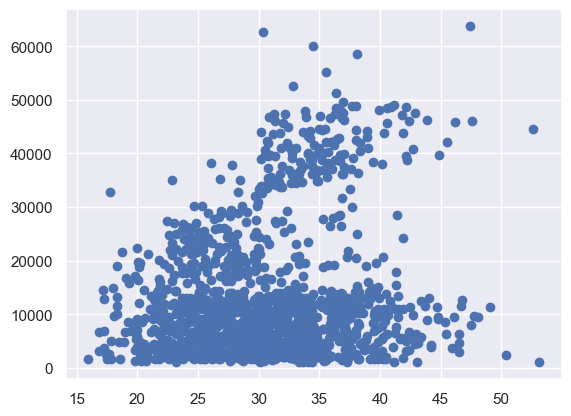

In [123]:
plt.scatter(X['bmi'],Y)
plt(X['bmi'],LinearRegression().fit(x_).predict(X['bmi']), color='red')
plt.show()

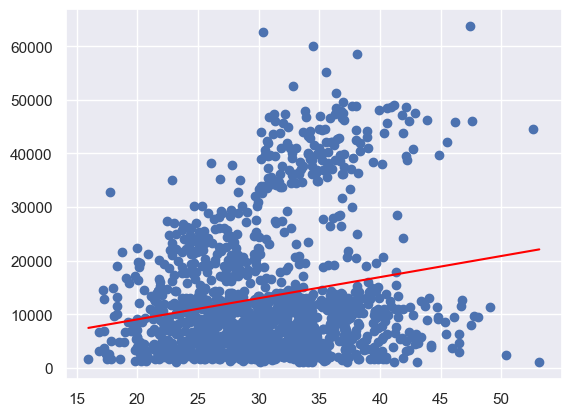

In [133]:
col = 'bmi'
plt.scatter(X[col],Y)
plt.plot(np.unique(X[col]), np.poly1d(np.polyfit(X[col], Y, 1))(np.unique(X[col])), color='red')

In [47]:
X.size

12042

In [130]:
X.columns[0]

'age'

# SGD

In [8]:
import tensorflow as tf;
import numpy as np;
import argparse

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adadelta, Adam, Adagrad, Adamax, Nadam, RMSprop 
from tensorflow.keras.losses import mse

Printing behins here: ----------------
Epoch 1/100
34/34 [==============================] - 4s 3ms/step - loss: 13199.0742
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13115.2383
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13031.3906
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12947.6338
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 12863.8203
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12780.0498
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12696.2959
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12612.3838
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12528.6406
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 12444.7354
Epoch 11/100
34/34 [==============================] - 0s 1ms/step - loss: 12360.8877
Epoch 12/100
34/34 [===============

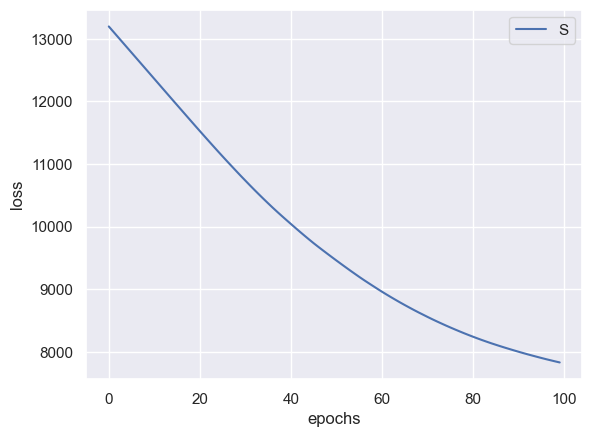

In [12]:
#SGD
# Use the required optimizer to compile the model

model = Sequential()
model.add(Dense(1))

print("Printing behins here: ----------------")
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.0,
    nesterov=False,),loss=tf.keras.losses.mean_absolute_error)
train = model.fit(x_train,y_train,epochs=100)

#loss over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('SGD')
# model.predict(x_test,y_test)

In [50]:
y_train

216     10355.64100
731     10065.41300
866      1141.44510
202     13012.20865
820      7445.91800
           ...     
715     12146.97100
905      4564.19145
1096    44641.19740
235     19444.26580
1061    11554.22360
Name: charges, Length: 1070, dtype: float64

In [10]:

def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input "x" has already been passed through the sigmoid
	# activation function
	return x * (1 - x)

In [11]:
def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))
	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1
	# return the predictions
	return preds

In [12]:
def next_batch(X, y, batchSize):
	# loop over our dataset "X" in mini-batches, yielding a tuple of
	# the current batched data and labels
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

In [13]:
X = np.c_[X, np.ones((X.shape[0]))]

In [14]:
X

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 3., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.]])

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

In [16]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

[INFO] training...


In [17]:
# construct the argument parse and parse the arguments

import easydict
args = easydict.EasyDict({
        "batch-size": 32,
        "epochs": 100,
        "alpha": 0.01,
})
print(args["epochs"])

100


In [24]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
	# initialize the total loss for the epoch
	epochLoss = []
	# loop over our data in batches
	for (batchX, batchY) in next_batch(x_train, y_train, args["batch-size"]):
		# take the dot product between our current batch of features
		# and the weight matrix, then pass this value through our
		# activation function
		preds = sigmoid_activation(batchX.dot(W))
		print(preds)
		# preds = preds.flatten()
		# now that we have our predictions, we need to determine the
		# "error", which is the difference between our predictions
		# and the true values
		print(preds.shape)
		error = (preds - batchY)
		epochLoss.append(np.sum(error ** 2))
		# the gradient descent update is the dot product between our
		# (1) current batch and (2) the error of the sigmoid
		# derivative of our predictions
		d = error * sigmoid_deriv(preds)
		gradient = batchX.T.dot(d)
		# gradient = gradient.flatten()
		# in the update stage, all we need to do is "nudge" the
		# weight matrix in the negative direction of the gradient
		# (hence the term "gradient descent" by taking a small step
		# towards a set of "more optimal" parameters
		print(args["alpha"])
		W = W+ -args["alpha"] * gradient
		# update our loss history by taking the average loss across all
	# batches
	loss = np.average(epochLoss)
	losses.append(loss)
	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1.

ValueError: operands could not be broadcast together with shapes (32,10) (32,) 